# Churn Prediction - Proyect

In [1]:
__author__ = "Jorge Aliaga Luque"
__website__ = "https://jorgealiaga36.github.io/jorge-aliaga-luque/"

The main goal of this proyect is to apply machine learning to `predict churn in a telecom company`.

Imagine that we are working at a telecom company that offers phone and internet services, and we have a problem: some of our customers are churning. They no longer are using our services and are going to a different provider. We would like to prevent that from happening, so we develop a system for identifying these customers and offer them an incentive to stay.

First, I carry out a deep exploratory data analysis for analying relationships between data. Then, I preprocess the data and I do some feature engineering. Finally, I train a `Logisctic Regression` model selecting the best hyperparameters that fit better for the application and I analize its performance.

### Dataset description

This dataset has the following information:
 + Services of the customers: phone; multiple lines; internet; tech support and extra services such as online security, backup, device protection, and TV streaming.
 + Account information: how long they have been clients, type of contract, type of payment method.
 + Charges: how much the client was charged in the past month and in total.
 + Demographic information: gender, age, and whether they have dependents or a partner.
 + Churn: yes/no, whether the customer left the company within the past month.

Dataset link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Table of Contents

- [**1. Dataset review and preparation**](#ap1)


- [**2. Exploratory data analysis**](#ap2)
 
    - 2.1. [Missing values](#ap2_1)
    
    - 2.2. [Distribution of the target variable](#ap2_2)
    
    - 2.3. [Numerical variables](#ap2_3)
        - 2.3.1. [Visualization](#ap_2_3_1)
        - 2.3.2. [Correlation](#ap_2_3_2)
       
    - 2.4. [Categorical variables](#ap2_4)
        - 2.4.1. [Visualization](#ap2_4_1)
        - 2.4.2. [Chi2 score](#ap2_4_2)
        
    
- [**3. Data Preprocessing and Feature engineering**](#ap3)

    - 3.1. [Feature Scaling](#ap3_1)
    - 3.2. [One hot encoding](#ap3_2)
    
    
- [**4. Model fitting and selection**](#ap4)

    - 4.1. [Hyperparameters tunning](#ap4_1)
    - 4.2. [Model selected](#ap4_2)
    - 4.3. [Evaluate model](#ap4_3)
    
     
- [**5. Model interpretation**](#ap5)

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style('darkgrid')

<a name="ap1"></a>
# 1. Dataset review  and preparation

### Load data

In [3]:
df = pd.read_csv('datasets/churn.csv')

print('Number of examples: {}'.format(len(df)))
df.head().T

Number of examples: 7043


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Data preparation 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see incorrect data types:

+ SeniorCitizen: Int64 type (1/0) where it should be object type (yes/no).
+ TotalCharges: Object type where it should be an Int64 type.
+ Churn: Object type (yes/no) where it should be an object type type (1/0).

In [5]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'yes', 0: 'No'})

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Also we must remove customer IDs from the dataset because it is not relevant for predicting when a customer is going to churn or not.

In [6]:
df = df.drop(columns = ['customerID'], axis=1)

In [7]:
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,No,No,No,No,No
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Describe data

In [9]:
catCols = list(df.select_dtypes(include='object').columns)
print('There are {} categorical variables: \n{}'.format(len(catCols), catCols))

There are 16 categorical variables: 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [10]:
#We exclude the target variable.

numCols = list(df.select_dtypes(exclude = 'object').columns[:-1]) 
print('There are {} numerical variables: \n{}'.format(len(numCols), numCols))

There are 3 numerical variables: 
['tenure', 'MonthlyCharges', 'TotalCharges']


<a name="ap2"></a>
# 2. Exploratory data analysis 

First we split our dataframe into X and y variables to avoid using our target variable in the training process.

In [11]:
X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

<a name="ap2_1"></a>
## 2.1. Missing values

In [12]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are some missing values for total charges. . 

+ It represents ~ 0.2% of the total users so it is better to remove these observations from the dataset.

In [13]:
percent = round(df.TotalCharges.isnull().sum()*100/len(df),2)
print('Total charges missing values: {} %'.format(percent))

Total charges missing values: 0.16 %


In [14]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]
X = X.drop(index=rows_with_nan)
y = y.drop(index=rows_with_nan)

X.TotalCharges.isnull().sum()

0

There is no missing values!

<a name="ap2_2"></a>
## 2.2. Target variable

As we can see the mayority of the customers did not churn.

We have an imbalanced dataset, there are three times as many people who did not churn as those who did churn.

In [15]:
global_mean = round(df['Churn'].mean(), 2)
print("Churn rate: {}".format(global_mean))

Churn rate: 0.27


0    5174
1    1869
Name: Churn, dtype: int64

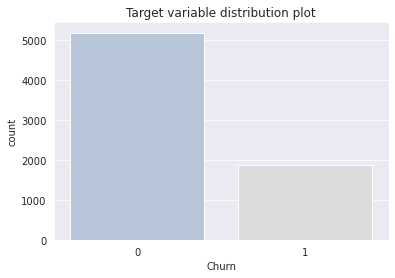

In [16]:
plt.figure(figsize=(6,4))

sns.countplot(data = df, x='Churn', palette=['#B0C4DE','#DCDCDC'])
plt.title('Target variable distribution plot')

df['Churn'].value_counts()

<a name="ap2_3"></a>
## 2.3. Numerical variables

In [17]:
print('There are {} numerical variables: \n{}'.format(len(numCols), numCols))

There are 3 numerical variables: 
['tenure', 'MonthlyCharges', 'TotalCharges']


### Dependency with target variable

<a name="ap2_3_1"></a>
### 2.3.1. Visualization

Let's plot these numerical variables for analizing it distribution for both churn values.

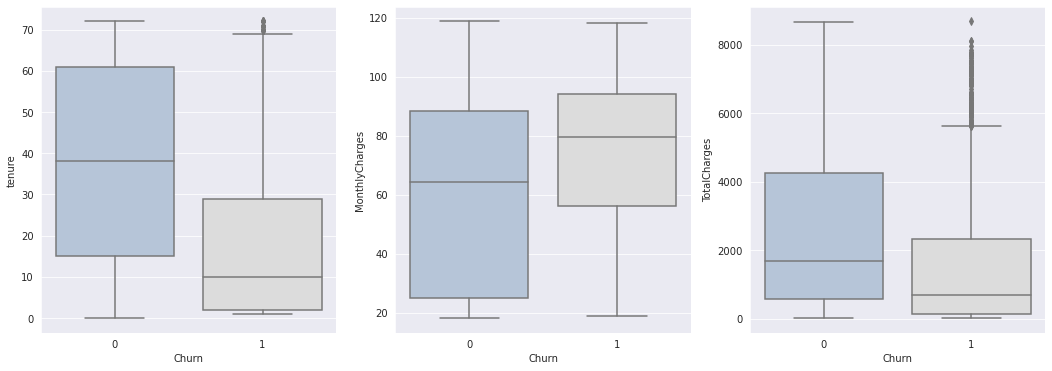

In [18]:
n_cols = 3
n_rows = 1
n_num = 0

fig, axarr = plt.subplots(n_rows, n_cols, figsize=(18, 6))

for column in np.arange(n_cols):
    sns.boxplot(y=numCols[n_num], x='Churn', data=df, ax=axarr[column], palette=['#B0C4DE','#DCDCDC'])
    n_num+=1

plt.show()

+ We can see that the distribution of values change depending of the churn value for each feature.
+ For tenure (churn=1) and total charges (churn=1) we can see some outliers so we should remove these observations from the dataset. That is because they are noise for the model and its performance could be afected.

<a name="ap2_3_2"></a>
### 2.3.2. Correlation

For numerical variables, we can measure the dependency between them and the target variable churn. The method selected is correlation:

In [19]:
df.Churn.astype(int)

corr = df.corrwith(df.Churn).sort_values(ascending=False)
print(corr)

Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199484
tenure           -0.352229
dtype: float64


+ Tenure (`-0.35`):  The longer customers stay, the less often they tend to churn.
+ Monthly charges (`0.19`): Customers who pay more tend to leave more often.
+ Total charges: (`-0.19`): The longer people stay with the company, the more they have paid in total, so it’s less likely that they will leave.

<a name="ap2_4"></a>
## 2.4. Categorical variables

In [20]:
print('There are {} categorical variables: \n{}'.format(len(catCols), catCols))

There are 16 categorical variables: 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Dependency with target variable

<a name="ap2_4_1"></a>
### 2.4.1. Visualization

Let's plot these categorical variables to analize their dependency with the target variable:

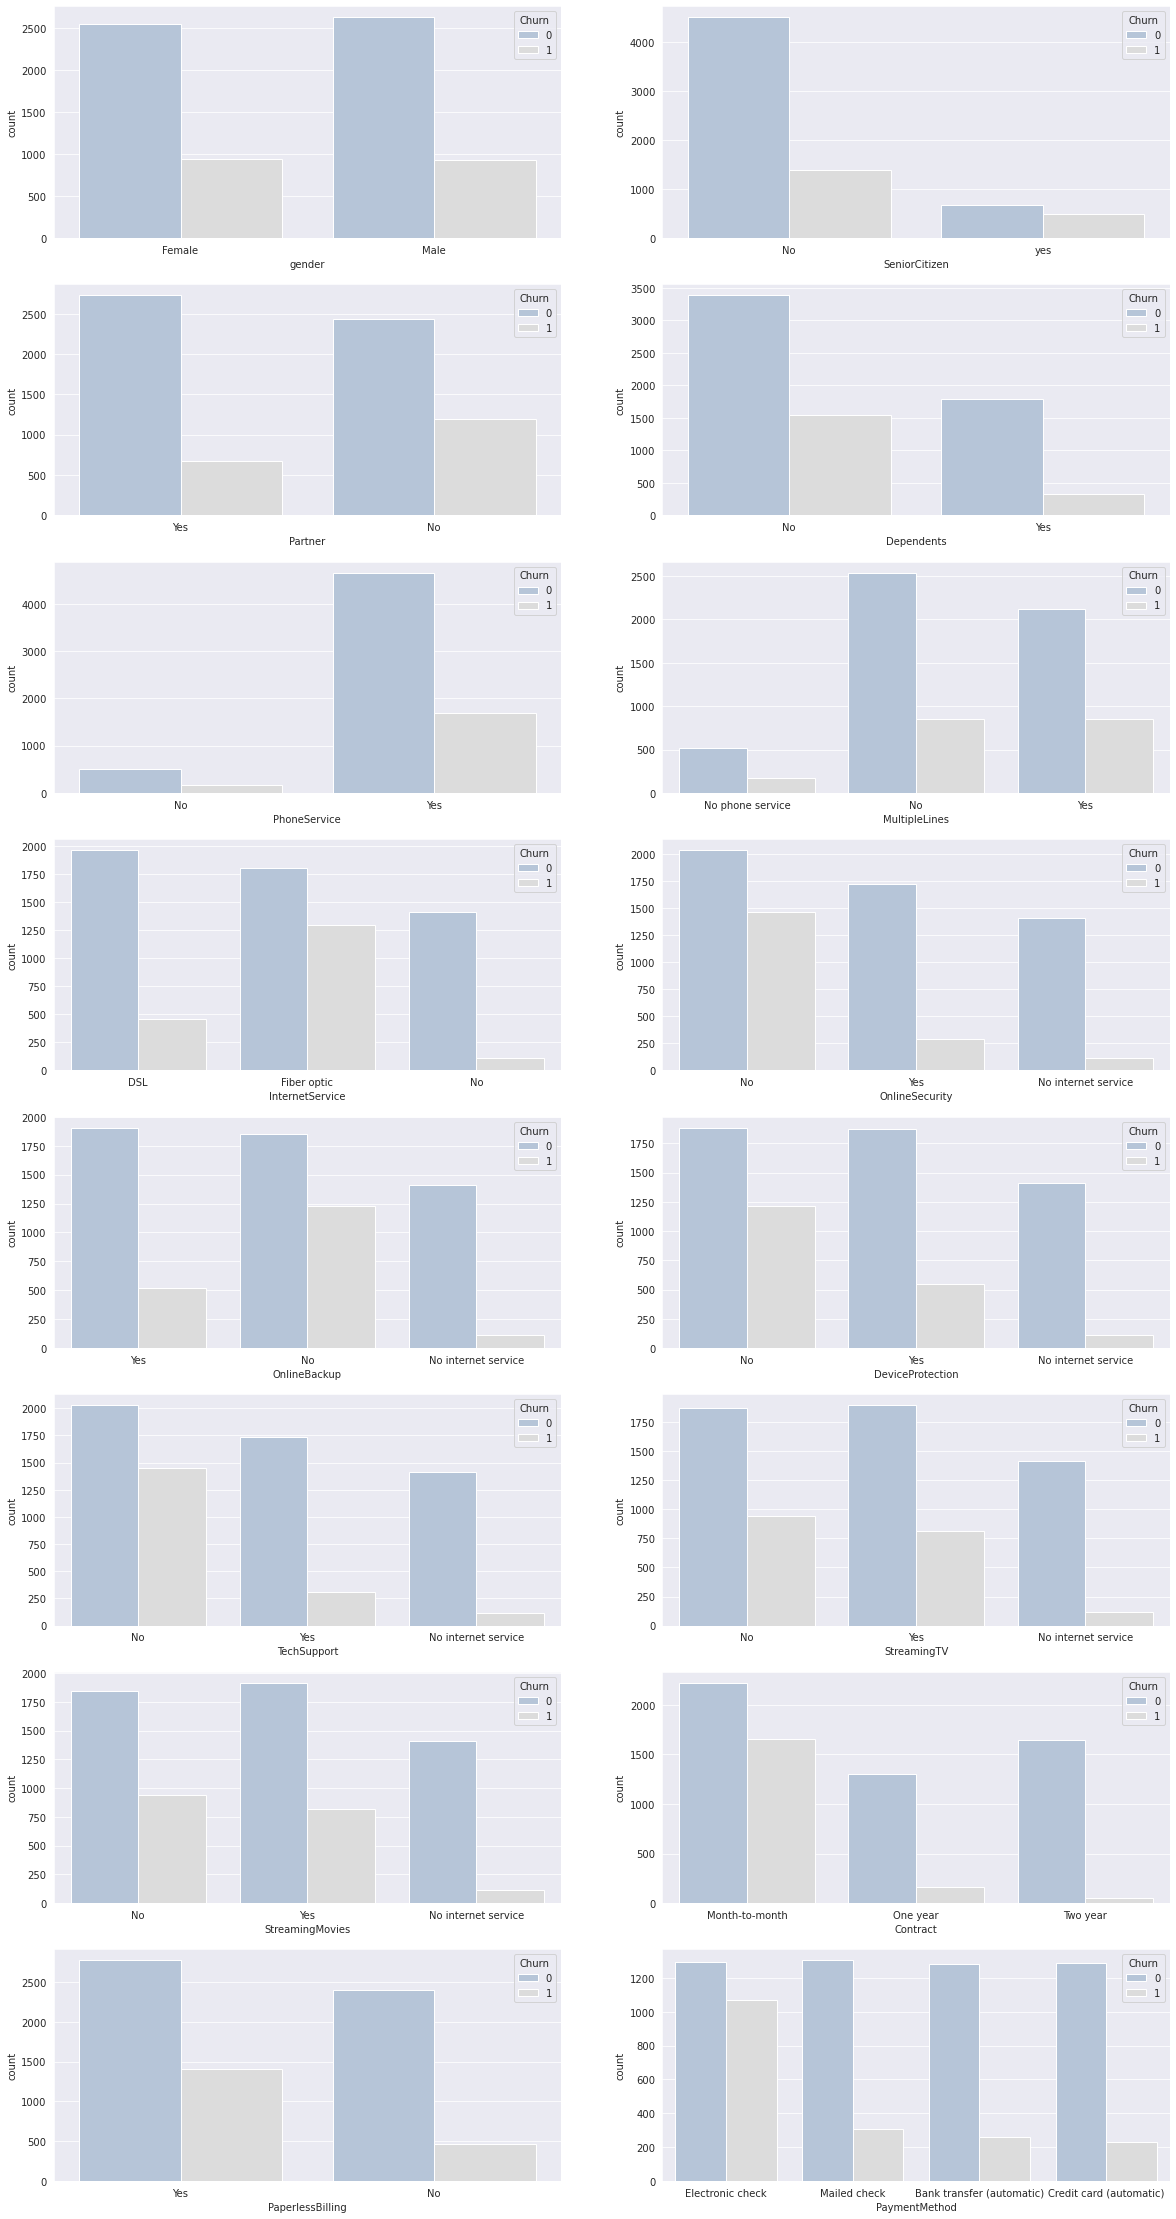

In [21]:
n_cols = 2
n_rows = 8
n_cat = 0

fig, axarr = plt.subplots(n_rows, n_cols, figsize=(20, 40))

for row in np.arange(n_rows):
    for column in np.arange(n_cols):
        sns.countplot(x=catCols[n_cat], hue='Churn', data=df, ax=axarr[row][column], palette=['#B0C4DE','#DCDCDC'])
        n_cat+=1

+ We can see that the distribution of values change depending of the churn value for each feature.

<a name="ap2_4_2"></a>
### 2.4.2. Chi2 score

For measuring the dependency of our categorical variables and the target variable, we use `chi2`. We select the best 8 features with the highest value.

In [22]:
X_cat = pd.get_dummies(X[catCols])

feature_selection = SelectKBest(chi2, k=8)
feature_selection.fit(X_cat, y)
selected_features = list(X_cat.columns[feature_selection.get_support()])

print("The eight selected features are:\n\n", selected_features)

The eight selected features are:

 ['InternetService_Fiber optic', 'OnlineSecurity_No', 'TechSupport_No', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check']


Their corresponding scores are the following:

In [23]:
results = pd.DataFrame(list(zip(selected_features, feature_selection.scores_)), columns=['Features selected', 'chi2 scores'])
results.sort_values(by='chi2 scores', ascending=False)

,Features selected,chi2 scores
3,StreamingTV_No internet service,133.482766
7,PaymentMethod_Electronic check,131.271509
5,Contract_Month-to-month,81.857769
4,StreamingMovies_No internet service,76.324103
6,Contract_Two year,55.856253
2,TechSupport_No,25.880699
0,InternetService_Fiber optic,0.259116
1,OnlineSecurity_No,0.254297


<a name="ap3"></a>
# 3. Data Preprocessing and Feature engineering

<a name="ap3_1"></a>
## 3.1. Feature Scaling

It is highly recommended to scale the numerical features before training the model to achieve a better performance.

In [24]:
scaler = StandardScaler()
X[numCols] = scaler.fit_transform(X[numCols])

<a name="ap3_2"></a>
## 3.2. One-hot Encoding

Now we encode our categorical variables converting them into dummy features:

In [25]:
X = pd.get_dummies(X)

print("X shape: {}\n".format(X.shape))

X shape: (7032, 46)



In [26]:
X.head().T

,0,1,2,3,4
tenure,-1.280248,0.064303,-1.239504,0.512486,-1.239504
MonthlyCharges,-1.161694,-0.260878,-0.363923,-0.747850,0.196178
TotalCharges,-0.994194,-0.173740,-0.959649,-0.195248,-0.940457
gender_Female,1.000000,0.000000,0.000000,0.000000,1.000000
gender_Male,0.000000,1.000000,1.000000,1.000000,0.000000
SeniorCitizen_No,1.000000,1.000000,1.000000,1.000000,1.000000
SeniorCitizen_yes,0.000000,0.000000,0.000000,0.000000,0.000000
Partner_No,0.000000,1.000000,1.000000,1.000000,1.000000
Partner_Yes,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents_No,1.000000,1.000000,1.000000,1.000000,1.000000


We have all the data prepared. Therefore let's build our `Logistic Regression` model.

<a name="ap4"></a>
# 4. Model fitting and selection

### Selected features

In [27]:
final_features = selected_features + numCols
X = X[final_features]

X.head().T

,0,1,2,3,4
InternetService_Fiber optic,0.000000,0.000000,0.000000,0.000000,1.000000
OnlineSecurity_No,1.000000,0.000000,0.000000,0.000000,1.000000
TechSupport_No,1.000000,1.000000,1.000000,0.000000,1.000000
StreamingTV_No internet service,0.000000,0.000000,0.000000,0.000000,0.000000
StreamingMovies_No internet service,0.000000,0.000000,0.000000,0.000000,0.000000
Contract_Month-to-month,1.000000,0.000000,1.000000,0.000000,1.000000
Contract_Two year,0.000000,0.000000,0.000000,0.000000,0.000000
PaymentMethod_Electronic check,1.000000,0.000000,0.000000,0.000000,1.000000
tenure,-1.280248,0.064303,-1.239504,0.512486,-1.239504
MonthlyCharges,-1.161694,-0.260878,-0.363923,-0.747850,0.196178


### Train and test sets

We split our dataset into two parts: train and test sets:
+ Train set: 80%.
+ Test set: 20%.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<a name="ap4_1"></a>
## 4.1. Hyperparameter tunning

The model we are going to train is the `Logistic Regression`. 

First, we tune its hyperparameters to achieve the best performance as possible.

In [29]:
model = LogisticRegression(solver='liblinear', random_state=1)

In [30]:
params = {'C': [0.01, 0.1, 0.5, 1, 10, 50, 100]}

model_cv = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=10)
model_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=1, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 50, 100]},
             scoring='roc_auc')

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)[['params', 'mean_test_score']]
print(cv_results)

        params  mean_test_score
0  {'C': 0.01}         0.829336
1   {'C': 0.1}         0.838439
2   {'C': 0.5}         0.839783
3     {'C': 1}         0.839952
4    {'C': 10}         0.839992
5    {'C': 50}         0.840025
6   {'C': 100}         0.840021


In [32]:
print('Best param C: {} \nBest ROC: {} '.format(model_cv.best_params_,model_cv.best_score_))

Best param C: {'C': 50} 
Best ROC: 0.8400245925346678 


Having the model hyperparameters, let's implement it!

<a name="ap4_2"></a>
## 4.2. Model selected

We train the model with the training set and then we see its performance with the test set. 
The threshold value selected is 0.5 for the probabilities.

In [33]:
threshold_selected = 0.5

model = LogisticRegression(C=10)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]

In [34]:
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred>=threshold_selected)

<a name="ap4_3"></a>
## 4.3. Evaluate model

Having our model trained, now, we are going to analize its performance with different metrics:
+ Accuracy.
+ ROC and AUC.
+ Confusion matrix.
+ Precision, Recall and F1 score.

### Accuracy

Percentage of correct predictions the model makes.

+ We achieve an accuracy of ~80% so that's great!

In [35]:
print("Accuracy: {} %".format(round(accuracy,4)*100))

Accuracy: 79.89 %


### ROC and AUC

AUC: 0.8461


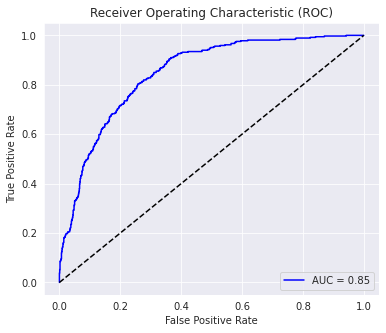

In [36]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

print("AUC: {}".format(round(roc_auc, 4)))

plt.figure(figsize = (6, 5))

plt.plot(fpr, tpr, color='blue', label='AUC = %0.2f' %roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed')

plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()

+ FPR (False Positive Rate) is the fraction of users we predicted as churning among everybody who didn’t churn.
+ TPR (True Positive Rate) is the fraction of users who we predicted as churning among everybody who actually did churn.

The AUC value is ~0.85 so it is indicative of a reasonably good model (AUC=1 for an ideal model). 

### Confusion matrix 

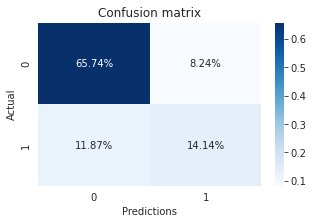

In [37]:
table = confusion_matrix(y_test, y_pred>=threshold_selected)

plt.figure(figsize=(5,3))

sns.heatmap(table/table.sum(), annot=True, cmap='Blues', fmt='.2%')

plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

We see that the model predicts negative values quite well: ~66% of the predictions are true negatives. However, it
makes quite a few mistakes of both types: the number of false positives and false negatives is roughly equal (8% and 12%, respectively).

### Precision , Recall and F1 score 

In [38]:
print(classification_report(y_test, y_pred>=threshold_selected))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.63      0.54      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



+ Precision helps us understand how many people received a promotional message by mistake. The better the precision, the fewer false positives we have. The precision of 63% means that 63% of the reached customers indeed were going to churn (our true positives), whereas the remaining 37% were not (false positives). 
+ Recall helps us understand how many of the churning customers we failed to find. The better the recall, the fewer false negatives we have. The recall of 54% means that we reach only 54% of all churning users (true positives) and fail to identify the remaining 46% (false negatives). 

Although the accuracy of 80% might suggest that the model is great, looking at its precision and recall tells us that it actually makes quite a few errors.

<a name="ap5"></a>
# 5. Model interpretation

Finally, let's analize what are the conclusions made by our model:

In [39]:
feat_imp = pd.DataFrame({'features': X_test.columns, 'weights': model.coef_[0]})

### Positive weights

From Logistic Regression algorithm we can conclude tha the following features are the most important varaibles to predict  `churn`. They have a positive impact when a costumer is going to churn:

+ `TotalCharges`
+ `Contract_Month-to-month`
+ `InternetService_Fiber optic`

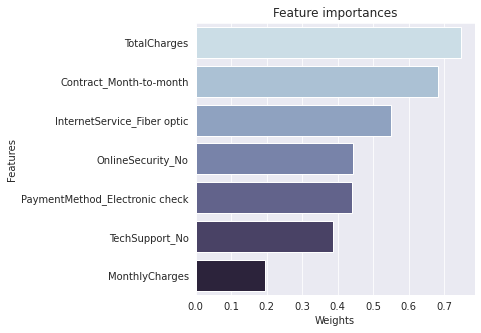

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(data=feat_imp.sort_values(by='weights', ascending=False)[:7], 
            x='weights', 
            y='features', 
            orient='h',
            palette='ch:s=.25,rot=-.25')
            
plt.title('Feature importances')
plt.ylabel('Features')
plt.xlabel('Weights')
            
plt.show()

### Negative weights

From Logistic Regression algorithm we can conclude that the following features are the most important for predicting `no churn`. They have a negative impact on churning:
+ `Tenure`
+ `Contract_Two_year`

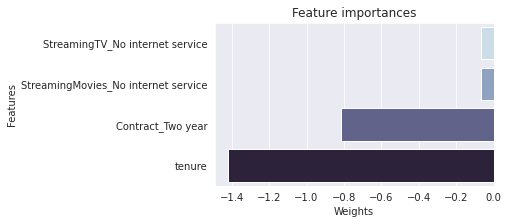

In [59]:
plt.figure(figsize=(5,3))
sns.barplot(data=feat_imp.sort_values(by='weights', ascending=False)[-4:], 
            x='weights', 
            y='features', 
            orient='h',
            palette='ch:s=.25,rot=-.25')
            
plt.title('Feature importances')
plt.ylabel('Features')
plt.xlabel('Weights')
            
plt.show()